# **1. 벡터 데이터베이스**
벡터 데이터베이스(Vector Database)는 텍스트, 이미지, 오디오와 같은 데이터를 고차원 벡터 형태로 변환해 저장하고, 이 벡터 간의 유사도를 빠르게 검색할 수 있도록 최적화된 데이터베이스입니다. 일반적인 관계형 데이터베이스가 정확한 값 기반 검색(SQL 쿼리 등)에 적합하다면, 벡터 데이터베이스는 의미적 유사성(semantic similarity)에 기반한 검색을 지원하여 예를 들어 "강아지"와 "개"처럼 다른 표현이라도 비슷한 의미의 데이터를 찾아낼 수 있습니다. 이를 위해 코사인 유사도, 내적(dot product), 유클리드 거리와 같은 수학적 거리 계산을 활용하며, 대규모 임베딩(embedding) 데이터를 효율적으로 관리하고 검색할 수 있어 추천 시스템, 검색 엔진, 생성형 AI의 RAG(Retrieval-Augmented Generation) 등에 널리 활용됩니다.

**크로마디비**

[크로마디비(ChromaDB)](https://www.trychroma.com/)는 대표적인 오픈소스 벡터 데이터베이스로, 문서·이미지·코드 등 다양한 데이터를 임베딩 벡터로 변환해 저장하고, 이를 빠르게 검색할 수 있도록 설계된 시스템입니다. 파이썬 기반으로 사용이 간편하며, LangChain 같은 LLM 프레임워크와 잘 통합되어 RAG(Retrieval-Augmented Generation) 구조를 쉽게 구축할 수 있습니다. 내부적으로는 벡터 인덱싱과 메타데이터 저장을 함께 지원하여, 단순히 유사도 검색뿐 아니라 조건 필터링과 결합된 검색도 가능합니다. 무료로 가볍게 실행할 수 있고, 로컬 환경부터 클라우드까지 유연하게 확장할 수 있어 학습용이나 실무용 AI 검색 엔진 구축에 많이 활용됩니다.

In [ ]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [ ]:
!pip install langchain_community

!pip install langchain_experimental

!pip install langchain_openai

!pip install pypdf

# **2. 청크**
청크(Chunk)는 긴 텍스트나 문서를 작은 단위로 나눈 조각을 의미하며, 주로 자연어 처리와 RAG(Retrieval-Augmented Generation) 같은 작업에서 사용됩니다. 대형 언어모델은 한 번에 처리할 수 있는 토큰 수에 한계가 있기 때문에 문서를 일정한 길이로 분할하여 임베딩 벡터로 변환하고, 이후 검색이나 질의 응답 시 필요한 청크만 불러와 모델에 전달하는 방식으로 효율성과 정확성을 높입니다. 청크는 단순히 일정 글자 수나 토큰 수로 나누기도 하지만, 문단·문장 단위 등 의미 단위로 나누어야 검색 품질이 좋아지며, 결국 청크는 방대한 데이터를 모델이 다룰 수 있는 크기로 잘게 나눈 최소 단위라고 할 수 있습니다.

**SemanticChunker**

SemanticChunker는 텍스트를 단순히 일정한 길이로 자르는 방식이 아니라, 문장의 의미적 맥락을 고려해 자연스럽게 분할하는 청크 생성 기법입니다. 즉, 문장이나 문단의 의미가 단절되지 않도록 문맥 단위로 텍스트를 나누어 임베딩과 검색의 정확도를 높여줍니다. 이를 통해 RAG(Retrieval-Augmented Generation) 구조에서 모델이 보다 관련성 높은 정보를 검색할 수 있으며, 불필요하게 잘려나간 조각이나 중복된 정보 전달을 줄일 수 있습니다. 따라서 SemanticChunker는 의미 기반 검색과 대규모 문서 처리에서 효율성과 정밀도를 동시에 향상시키는 중요한 도구로 활용됩니다.

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

In [ ]:
file_path = "SPRi AI Brief_4월호_산업동향_250407_F.pdf"

In [ ]:
loader = PyPDFLoader(file_path)
pages = []

# 비동기로 한 번에 전부 읽지 않고 페이지 단위로 스트리밍
async for page in loader.alazy_load():
    pages.append(page)

text_splitter = SemanticChunker(OpenAIEmbeddings())

# 페이지별 문서를 여러 개의 의미 청크로 쪼개 반환
docs = text_splitter.split_documents(pages)

print(f"총 {len(docs)}개 만큼의 문서로 청킹되었습니다.")
print([len(i.page_content) for i in docs])

총 33개 만큼의 문서로 청킹되었습니다.
[22, 922, 19, 1562, 1447, 1645, 1682, 19, 1291, 1777, 1801, 1528, 1656, 1755, 78, 1659, 1055, 19, 1545, 1662, 1690, 1628, 91, 1684, 19, 1619, 10, 1447, 1678, 58, 1616, 2460, 225]


In [ ]:
# 각 청크의 메타데이터 및 내용 출력
for i in docs:
    print(i.metadata)       # 문서의 메타데이터 출력 (예: 페이지 번호 등)
    print(i.page_content)   # 분할된 청크의 내용 출력
    print("-" * 100)        # 구분선 출력

{'producer': 'Hancom PDF 1.3.0.505', 'creator': 'Hancom PDF 1.3.0.505', 'creationdate': '2025-04-04T07:23:56+09:00', 'author': 'dj', 'moddate': '2025-04-04T07:23:56+09:00', 'pdfversion': '1.4', 'source': 'SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'total_pages': 29, 'page': 0, 'page_label': '1'}
2025년4월호인공지능 산업의 최신 동향
----------------------------------------------------------------------------------------------------
{'producer': 'Hancom PDF 1.3.0.505', 'creator': 'Hancom PDF 1.3.0.505', 'creationdate': '2025-04-04T07:23:56+09:00', 'author': 'dj', 'moddate': '2025-04-04T07:23:56+09:00', 'pdfversion': '1.4', 'source': 'SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'total_pages': 29, 'page': 1, 'page_label': '2'}
SPRi AI Brief2025년 4월호
2
CONTENTS정책･법제∙2025년 중국 양회의 정부 업무보고, AI 플러스 행동의 지속 추진을 천명2∙중국 정부, 2025년 9월부터 AI 생성·합성물 표시 의무화 규정 시행 예정 발표3∙인도 전자정보기술부, AI 강국 실현을 위한 AI 로드맵 공개4∙영국 경쟁시장청, 마이크로소프트와 오픈AI 협력 관련 반독점 조사 종료 발표5기업･산업∙구글, 단일 GPU로 구동 가능한 오픈소스 AI 모델 ‘젬마 3’ 공개7∙ 오픈AI, AI 에이전트 구축 지원 도구와 신규 음성·이미지 

# **3. 벡터 리트리버**
벡터 리트리버(Vector Retriever)는 사용자의 질의(Query)를 임베딩 벡터로 변환한 뒤, 벡터 데이터베이스에 저장된 청크(Chunk) 벡터들과의 유사도를 계산하여 가장 관련성 높은 결과를 찾아주는 구성 요소입니다. 즉, “검색기” 역할을 하는데, 단순히 키워드 일치를 찾는 것이 아니라 의미적 유사성을 기반으로 정보를 불러옵니다. 이를 위해 코사인 유사도, 내적(dot product), 유클리드 거리 등의 수학적 방법을 활용하며, 검색된 결과는 LLM과 결합되어 RAG(Retrieval-Augmented Generation) 같은 구조에서 모델의 답변 품질을 높이는 데 쓰입니다. 쉽게 말해, 벡터 리트리버는 “의미를 이해하는 검색 엔진”이라고 할 수 있습니다.

from_documents

* documents (List[Document]): 벡터 저장소에 추가할 문서 리스트
* embedding (Optional[Embeddings]): 임베딩 함수. 기본값은 None
* ids (Optional[List[str]]): 문서 ID 리스트. 기본값은 None
collection_name (str): 생성할 컬렉션 이름.
* persist_directory (Optional[str]): 컬렉션을 저장할 디렉토리. 기본값은 None
* client_settings (Optional[chromadb.config.Settings]): Chroma 클라이언트 설정
* client (Optional[chromadb.Client]): Chroma 클라이언트 인스턴스
* collection_metadata (Optional[Dict]): 컬렉션 구성 정보. 기본값은 None

In [ ]:
!pip install langchain_chroma

!pip install -U langchain langchain-chroma langchain-openai chromadb

!pip install -U "opentelemetry-api==1.26.0" \
              "opentelemetry-sdk==1.26.0" \
              "opentelemetry-exporter-otlp-proto-grpc==1.26.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 8.7.0
    Uninstalling importlib_metadata-8.7.0:
      Successfully uninstalled importlib_metadata-8.7.0
  Attempting uninstall: opentelemetry-proto
    Found existing installation: opentelemetry-proto 1.37.0
    Uninstalling opentelemetry-proto-1.37.0:
      Successfully uninstalled opentelemetry-proto-1.37.0
  Attempting uninstall: opentelem

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=docs, embedding=OpenAIEmbeddings())

In [ ]:
# query = "카나나의 테크니컬 리포트는 어떤 내용인가요?"
# query = "에이전트 SDK는 어떤 기능을 제공하나요?"
query = "딥마인드가 발표한 로봇AI 모델은?"

results = vectorstore.similarity_search(query, k=1)

In [ ]:
print(results[0].page_content)

SPRi AI Brief2025년 4월호
16
구글 딥마인드, 로봇 특화 AI 모델 ‘제미나이 로보틱스’ 개발n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스’를 공개n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스-ER’도 공개
KEY Contents
£‘제미나이 로보틱스’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유n구글 딥마인드(Google Deepmind)가 2025년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 로보틱스(Gemini Robotics)’를 공개∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로, 로봇을 직접 제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며, 학습 과정에서 접하지 못한 새로운 물체나 환경에서도 기존에 학습한 지식을 응용해 다양한 작업을 즉각 수행하는 범용성을 보유* Vision-Language-Action: 시각, 언어, 행동을 통합적으로 이해하고 처리하는 AI 모델∙구글 딥마인드는 종합적인 범용성 벤치마크에서 제미나이 로보틱스가 다른 첨단 시각-언어-행동 모델보다 평균 두 배 이상의 성능 향상을 보였다고 보고*n구글 딥마인드에 따르면 제미나이 로보틱스는 제미나이의 언어 이해 능력을 바탕으로 일상적 대화체의 명령을 이해하고 다양한 언어로 답변할 수 있으며, 복잡한 다단계 작업도 수행 가능∙주변 환경을 지속적으로 모니터링하여 환경이나 명령의 변화를 감지하고 즉시 행동을 수정할 수 있어, 다양한 환경에서 로봇과 협력할 수 있도록 지원∙종이접기처럼 섬세한 운동 능력과 정밀한 조작을 요구하는 작업을 수행할 수 있으며, 로봇 유형별로 쉽게 적응할 수 있도록 설계되어 많은 연구실에서 사용되는 양팔 로봇 플랫폼뿐 아니라 휴머노이드 로봇과 같은 복잡한 

In [ ]:
# 벡터스토어를 검색기로 바꿔줌. 가장 유사한 문서 1개만 찾음
vector_retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
relevant_doc = vector_retriever.invoke(query)
print(relevant_doc)

In [ ]:
print(relevant_doc[0].page_content)

SPRi AI Brief2025년 4월호
16
구글 딥마인드, 로봇 특화 AI 모델 ‘제미나이 로보틱스’ 개발n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스’를 공개n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스-ER’도 공개
KEY Contents
£‘제미나이 로보틱스’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유n구글 딥마인드(Google Deepmind)가 2025년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 로보틱스(Gemini Robotics)’를 공개∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로, 로봇을 직접 제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며, 학습 과정에서 접하지 못한 새로운 물체나 환경에서도 기존에 학습한 지식을 응용해 다양한 작업을 즉각 수행하는 범용성을 보유* Vision-Language-Action: 시각, 언어, 행동을 통합적으로 이해하고 처리하는 AI 모델∙구글 딥마인드는 종합적인 범용성 벤치마크에서 제미나이 로보틱스가 다른 첨단 시각-언어-행동 모델보다 평균 두 배 이상의 성능 향상을 보였다고 보고*n구글 딥마인드에 따르면 제미나이 로보틱스는 제미나이의 언어 이해 능력을 바탕으로 일상적 대화체의 명령을 이해하고 다양한 언어로 답변할 수 있으며, 복잡한 다단계 작업도 수행 가능∙주변 환경을 지속적으로 모니터링하여 환경이나 명령의 변화를 감지하고 즉시 행동을 수정할 수 있어, 다양한 환경에서 로봇과 협력할 수 있도록 지원∙종이접기처럼 섬세한 운동 능력과 정밀한 조작을 요구하는 작업을 수행할 수 있으며, 로봇 유형별로 쉽게 적응할 수 있도록 설계되어 많은 연구실에서 사용되는 양팔 로봇 플랫폼뿐 아니라 휴머노이드 로봇과 같은 복잡한 

**앙상블 리트리버**

앙상블 리트리버(Ensemble Retriever)는 하나의 검색 방식에만 의존하지 않고, 여러 종류의 리트리버를 조합해 더 정확하고 풍부한 검색 결과를 제공하는 방법입니다. 예를 들어 키워드 기반의 전통적 BM25 리트리버와 의미 기반의 벡터 리트리버를 함께 사용하면, 단어가 정확히 일치하는 문서뿐 아니라 의미적으로 관련 있는 문서도 함께 찾아낼 수 있습니다. 이렇게 서로 다른 리트리버의 강점을 결합하면 검색 누락을 줄이고, 다양한 관점에서 문서를 확보할 수 있어 RAG(Retrieval-Augmented Generation) 구조에서 더욱 신뢰도 높은 응답을 생성하는 데 유용합니다.

**BM25 리트리버**

BM25 리트리버는 전통적인 정보 검색 기법 중 하나로, 사용자의 질의(Query)와 문서 간의 키워드 일치 정도를 계산해 관련성이 높은 문서를 찾아주는 방식입니다. 기본적으로 단어 빈도(Term Frequency), 역문서 빈도(Inverse Document Frequency), 그리고 문서 길이를 고려해 점수를 매기며, 특정 단어가 질의에 많이 등장하거나 드문 단어일수록 가중치를 높게 주어 검색 정확도를 높입니다. 벡터 리트리버처럼 의미적 유사성을 직접 파악하지는 못하지만, 빠르고 해석 가능한 결과를 제공하기 때문에 대규모 문서 검색이나 키워드 중심 검색에서 여전히 많이 활용되며, 종종 벡터 리트리버와 결합해 앙상블 리트리버로 사용됩니다.

In [ ]:
!pip install rank_bm25

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

bm25_retriever = BM25Retriever.from_documents(
    docs,
)
bm25_retriever.k = 1

In [ ]:
ensemble_retriever = EnsembleRetriever(
    # BM25에 더 높은 비중(70%)을 주고, 임베딩 검색은 보조(30%)로 섞음
    retrievers=[bm25_retriever, vector_retriever],
    weights=[0.7, 0.3],
)

In [ ]:
query = "깊이 업스케일링 (Depth UP-Scaling)"

In [ ]:
ensemble_result = ensemble_retriever.invoke(query)
bm25_result = bm25_retriever.invoke(query)
vector_result = vector_retriever.invoke(query)

print("[Ensemble Retriever]")
for doc in ensemble_result:
    print(f"Content: {doc.page_content}")
    print()

print("[BM25 Retriever]")
for doc in bm25_result:
    print(f"Content: {doc.page_content}")
    print()

print("[Vector Retriever]")
for doc in vector_result:
    print(f"Content: {doc.page_content}")
    print()

[Ensemble Retriever]
Content: 홈페이지 : https://spri.kr보고서와 관련된 문의는 AI정책연구실(hs.lee@spri.kr, 031-739-7333)로 연락주시기 바랍니다.경기도 성남시 분당구 대왕판교로 712번길 22 글로벌 R&D 연구동(B) 4층22, Daewangpangyo-ro 712beon-gil, Bundang-gu, Seongnam-si, Gyeonggi-do, Republic of Korea, 13488

Content: 2025년4월호인공지능 산업의 최신 동향

[BM25 Retriever]
Content: 홈페이지 : https://spri.kr보고서와 관련된 문의는 AI정책연구실(hs.lee@spri.kr, 031-739-7333)로 연락주시기 바랍니다.경기도 성남시 분당구 대왕판교로 712번길 22 글로벌 R&D 연구동(B) 4층22, Daewangpangyo-ro 712beon-gil, Bundang-gu, Seongnam-si, Gyeonggi-do, Republic of Korea, 13488

[Vector Retriever]
Content: 2025년4월호인공지능 산업의 최신 동향



In [ ]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 13.5 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import StateGraph, MessagesState

class State(MessagesState):
    context: str

graph_builder = StateGraph(State)

In [ ]:
from langchain_core.messages import HumanMessage

def retriever(state: State):
    """
    Retrieve the relevant document and return the content.
    """
    print("##### RETRIEVER #####")
    query = state["messages"][0].content
    ensemble_result = ensemble_retriever.invoke(query)

    content = ensemble_result[0].page_content
    print("[CONTEXT]\n", content)

    return {"context" : content, "messages": [HumanMessage(content=content)]}

# **4. 랭체인 허브**
[랭체인 허브(LangChain Hub)](https://smith.langchain.com/hub)는 개발자와 연구자들이 프롬프트(Prompt), 체인(Chain), 에이전트(Agent) 같은 LLM 관련 리소스를 공유하고 재사용할 수 있도록 만든 오픈 플랫폼입니다. 사용자는 자신이 만든 프롬프트 템플릿을 업로드해 다른 사람과 공유할 수 있고, 다른 사람이 만든 검증된 프롬프트를 hub.pull() 같은 방식으로 손쉽게 불러와 활용할 수 있습니다. 이를 통해 매번 새롭게 프롬프트를 설계할 필요 없이 빠르게 실험하고 협업할 수 있으며, 다양한 검색 기능을 제공해 특정 목적(Q&A, 요약, RAG 등)에 맞는 템플릿을 쉽게 찾을 수 있습니다. 결국 랭체인 허브는 LLM 애플리케이션 개발을 가속화하는 중앙 저장소 역할을 합니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain import hub

llm = ChatOpenAI(model="gpt-5-nano", temperature=0)  # temperature=0: 일관적인 답변

def answer(state: State):
    """
    Answer the question based on the retrieved document.
    """
    print("##### ANSWER #####")
    query = state["messages"][0].content
    context = state["messages"][-1].content
    # context = state["context"]

    # prompt = ChatPromptTemplate.from_messages(
    #     [
    #         ("system",
    #          """
    #             You are an assistant for answering questions based on retrieved document context.
    #             Answer in Korean.

    #             Context: {context}"""
    #          ),
    #         ("human", "{question}"),
    #     ]
    # )
    prompt = hub.pull("rlm/rag-prompt")
    # You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
    # Question: {question}
    # Context: {context}
    # Answer:

    response = llm.invoke(
        prompt.format_messages(context=context, question=query)
    )

    return {"messages": [response]}

In [ ]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [ ]:
from langgraph.graph import START, END

graph_builder.add_sequence([retriever, answer])
graph_builder.add_edge(START, "retriever")
graph_builder.add_edge("answer", END)
graph = graph_builder.compile()
graph

ValueError: Node names must be unique: node with the name 'retriever' already exists. If you need to use two different runnables/callables with the same name (for example, using `lambda`), please provide them as tuples (name, runnable/callable).

In [ ]:
response = graph.invoke({"messages": "카나나의 테크니컬 리포트는 어떤 내용인가요?"})

for mes in response['messages']:
    mes.pretty_print()

NameError: name 'graph' is not defined

In [ ]:
from langchain.tools.retriever import create_retriever_tool

# 검색기, Tool 이름, Tool 설명(언제 이 툴을 써야 할지 설명)
retriever_tool = create_retriever_tool(
    ensemble_retriever,
    "retrieve_AI_brief",
    "Search and return information about AI Technology and Industry.",
)

tools = [retriever_tool]

In [ ]:
from langgraph.graph import StateGraph, MessagesState

graph_builder = StateGraph(MessagesState)

In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition

tool_node = ToolNode(tools=tools)
graph_builder.add_node("retriever", tool_node)

In [ ]:
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]} # 1) 도구 호출(tool_calls) 2) AI Message

graph_builder.add_node("chatbot", chatbot)

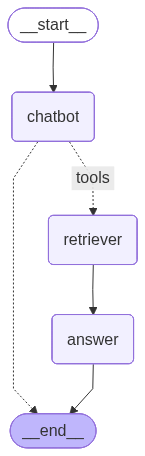

In [ ]:
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    {
        "tools" : "retriever",
        END: END
    }
)
graph_builder.add_node("answer", answer)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("retriever", "answer")
graph_builder.add_edge("answer", END)
graph = graph_builder.compile()
graph

In [ ]:
response = graph.invoke({"messages": "카나나의 테크니컬 리포트는 어떤 내용인가요?"})

for mes in response['messages']:
    mes.pretty_print()

================================ Human Message =================================

카나나의 테크니컬 리포트는 어떤 내용인가요?
================================== Ai Message ==================================

혹시 말씀하신 “카나나(Kanana)”가 누구를 가리키는지, 그리고 어떤 기술 리포트를 의미하는지 조금만 더 구체적으로 알려주실 수 있을까요? 예를 들면:
- 카나나가 특정 연구소/기업/캐릭터의 이름인지
- 특정 리포트의 제목이나 링크가 있는지

확실한 정보를 드리려면 추가 정보가 필요합니다. 다만 일반적으로 기술 리포트에 어떤 내용이 들어 있는지 미리 알려드리면 도움이 될 거예요.

일반적으로 기술 리포트에 포함되는 구성 요소
- 요약/초록
- 목적과 연구 범위
- 배경 및 관련 연구 소개
- 시스템 아키텍처나 설계 개요
- 데이터 및 실험 설정(데이터 수집 방법, 실험 환경 등)
- 구현 세부사항(알고리즘, 모델 구조, 파라미터 등)
- 실험 결과 및 분석(성능 지표, 비교 평가)
- 한계 및 위험 요인
- 결론 및 향후 연구/개선 방향
- 부록(추가 그래프, 수식, 구현 세부정보)
- 참고문헌

원하시면 제가 실제로 Kana나나의 특정 기술 리포트를 찾아 요약해 드릴 수 있습니다. 링크나 제목을 주시거나, 원하시는 분야(예: AI 모델 성능 평가, 시스템 아키텍처, 데이터 처리 파이프라인 등)를 알려주시면 더 구체적으로 도와드리겠습니다. 필요하시면 검색을 시도해 요약도 제공해 드릴 수 있어요.


In [ ]:
for chunk in graph.stream({"messages": "안녕하세요."}):
    for node, value in chunk.items():
        if node:
            print("=====", node, "=====")
        if "messages" in value:
            print(value['messages'][0].content)

===== chatbot =====
안녕하세요! 반갑습니다. 무엇을 도와드릴까요?

- AI 기술이나 산업 동향에 대해 간단히 정리해 드릴 수 있어요
- 특정 개념이나 용어를 설명해 드릴까요
- 한국어로 번역이나 글쓰기 도와드리기
- 코드나 기술 문제 해결에 도움 드리기
원하시는 주제를 말씀해 주시면 바로 도와드리겠습니다.


In [ ]:
.